In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 

In [3]:
df = pd.read_csv("dataset_comb.csv")
df = df.set_index("id")
df.head()



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,,,,,,,,,,,
1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [4]:
df['Class'] = df.Class.replace(to_replace=['jasmine', 'Gonen'], value=[0, 1])
df.Class.value_counts()

0    9985
1    8200
Name: Class, dtype: int64

## Pre-Processing

In [5]:
data = df.to_numpy()
X = data[:,0:10]
Y = data[:,10]
scaler = preprocessing.StandardScaler() #Normalisation

X = scaler.fit_transform(X)

print(X.mean(axis=0))
print(X.std(axis = 0))

[ 7.50201844e-17 -1.75047097e-15 -3.87604286e-16 -1.33160827e-15
  1.87550461e-16  1.47539696e-15 -7.75208572e-16 -1.15030949e-15
  2.81325691e-16 -1.50040369e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#model1 = LogisticRegression()
#output1 = cross_val_score(model1, X, Y, cv=7)
#output1 = output1.reshape([output1.shape[0], 1])
#output1


In [16]:
class classifier:
    def __init__(self, type_of_model):
        self.train_accuracy = []
        self.test_accuracy = []
        self.test_mean_Sq_error = []
        
        if(type_of_model == 'LR'):
            self.model = LogisticRegression()
        
        elif(type_of_model == 'NB'):
            self.model = GaussianNB()

        elif(type_of_model == 'LP'):
            self.model = Perceptron()
        
        elif(type_of_model == 'FLD'):
            self.model = LinearDiscriminantAnalysis()
        
        elif(type_of_model == 'SVM'):
            self.model = svm.SVC()
        
        elif(type_of_model == 'ANN'):
            self.model = MLPClassifier()


    def train(self, x_train, y_train, x_test, y_test):
        self.model_fit = self.model.fit(x_train, y_train)
        prediction_train = self.model_fit.predict(x_train)
        prediction_test = self.model_fit.predict(x_test)
        self.train_accuracy.append(accuracy_score(y_train, prediction_train))
        self.test_accuracy.append(accuracy_score(y_test, prediction_test))
        self.test_mean_Sq_error.append(mean_squared_error(y_test, prediction_test)) 

In [17]:
ob1 = classifier('FLD')
ob2 = classifier('LP')
ob3 = classifier('NB')
ob4 = classifier('LR')
ob5 = classifier('ANN')
ob6 = classifier('SVM')

kf = KFold(n_splits = 7, shuffle = True )
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    ob1.train(x_train, y_train, x_test, y_test)
    ob2.train(x_train, y_train, x_test, y_test)
    ob3.train(x_train, y_train, x_test, y_test)
    ob4.train(x_train, y_train, x_test, y_test)
    ob5.train(x_train, y_train, x_test, y_test)
    ob6.train(x_train, y_train, x_test, y_test)



In [18]:
df1 = pd.DataFrame({'LR': ob1.train_accuracy , 'NB': ob2.train_accuracy, 'LP': ob3.train_accuracy, 'FLD': ob4.train_accuracy, 'SVM': ob5.train_accuracy, 'ANN':ob6.train_accuracy})
print("Train Accuracies")
df1

Train Accuracies


,LR,NB,LP,FLD,SVM,ANN
0,0.986656,0.979085,0.983769,0.989286,0.991018,0.990762
1,0.986720,0.981716,0.983833,0.988773,0.990120,0.990569
2,0.986656,0.981844,0.983897,0.988773,0.990312,0.990312
3,0.987169,0.978700,0.983576,0.989350,0.990697,0.990377
4,0.986271,0.986784,0.983384,0.989607,0.990633,0.990569
5,0.987233,0.987875,0.984025,0.989735,0.990954,0.990762
6,0.986656,0.984347,0.983449,0.989158,0.990249,0.990826


In [24]:
df1.describe()

,LR,NB,LP,FLD,SVM,ANN
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.986766,0.982907,0.983705,0.989240,0.990569,0.990597
std,0.000333,0.003574,0.000240,0.000374,0.000351,0.000199
min,0.986271,0.978700,0.983384,0.988773,0.990120,0.990312
25%,0.986656,0.980400,0.983512,0.988966,0.990281,0.990473
50%,0.986656,0.981844,0.983769,0.989286,0.990633,0.990569
75%,0.986944,0.985565,0.983865,0.989478,0.990826,0.990762
max,0.987233,0.987875,0.984025,0.989735,0.991018,0.990826


In [19]:
df2 = pd.DataFrame({'FLD': ob1.test_accuracy , 'LP': ob2.test_accuracy, 'NB': ob3.test_accuracy, 'LR': ob4.test_accuracy, 'ANN': ob5.test_accuracy, 'SVM':ob6.test_accuracy})
print("Test Accuracies")
df2


Test Accuracies


,FLD,LP,NB,LR,ANN,SVM
0,0.987298,0.980754,0.983064,0.988838,0.988838,0.989992
1,0.986143,0.981909,0.982679,0.989992,0.990377,0.990762
2,0.988068,0.984988,0.982679,0.991147,0.992687,0.992302
3,0.983834,0.980370,0.984219,0.989222,0.989992,0.991532
4,0.989607,0.985758,0.984604,0.988068,0.989222,0.988838
5,0.984219,0.984988,0.982294,0.987683,0.989992,0.988838
6,0.987678,0.984213,0.985753,0.989218,0.989603,0.989988


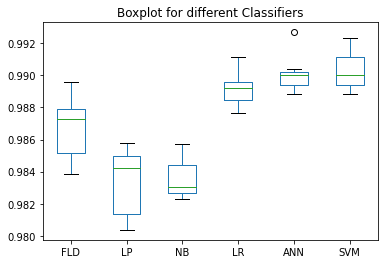

In [20]:
df2.plot.box(title='Boxplot for different Classifiers')

In [21]:
df2.describe()

,FLD,LP,NB,LR,ANN,SVM
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.986692,0.983283,0.983613,0.989167,0.990102,0.990322
std,0.002094,0.002220,0.001272,0.001164,0.001252,0.001304
min,0.983834,0.980370,0.982294,0.987683,0.988838,0.988838
25%,0.985181,0.981332,0.982679,0.988453,0.989413,0.989413
50%,0.987298,0.984213,0.983064,0.989218,0.989992,0.989992
75%,0.987873,0.984988,0.984411,0.989607,0.990185,0.991147
max,0.989607,0.985758,0.985753,0.991147,0.992687,0.992302


In [23]:
df3 = pd.DataFrame({'FLD': ob1.test_mean_Sq_error , 'LP': ob2.test_mean_Sq_error, 'NB': ob3.test_mean_Sq_error, 'LR': ob4.test_mean_Sq_error, 'ANN': ob5.test_mean_Sq_error, 'SVM':ob6.test_mean_Sq_error})
print("MSE for Test")
df3.describe()

MSE for Test


,FLD,LP,NB,LR,ANN,SVM
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.013308,0.016717,0.016387,0.010833,0.009898,0.009678
std,0.002094,0.002220,0.001272,0.001164,0.001252,0.001304
min,0.010393,0.014242,0.014247,0.008853,0.007313,0.007698
25%,0.012127,0.015012,0.015589,0.010393,0.009815,0.008853
50%,0.012702,0.015787,0.016936,0.010782,0.010008,0.010008
75%,0.014819,0.018668,0.017321,0.011547,0.010587,0.010587
max,0.016166,0.019630,0.017706,0.012317,0.011162,0.011162
